The goal of this notebook is to check if the result from the first iteration makes sense or not. We will narrow down the range for identifty the optimization after this.

In [1]:
import sys
print (sys.version)

2.7.12 |Anaconda 4.2.0 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


In [14]:
#Specify data directories
DataDir = r'C:/Users/Admin/Dropbox/Solar NEM (ERI)/Data manipulation/'
OutputDir = r'C:/Users/Admin/Dropbox/Solar NEM (ERI)/PEA_Solar_hotspot_paper/output/'

#Specify SDK directory
SDKdir = r"C:/Users/Admin/Downloads/sam-sdk-2016-3-14-r3/languages/python/"

#Import necessary Python libraries
import site
site.addsitedir(SDKdir)
from PySSC import PySSC

import csv
import os
import numpy
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
output_filenames = os.listdir(OutputDir+'first_iteration/')

In [4]:
len(output_filenames)

3465

In [6]:
#read all data as a data frame. This can be long due to large number of files
df = pd.DataFrame()
for output_filename in output_filenames:
    filename = OutputDir + 'first_iteration/'+ output_filename
    df = pd.concat([df,pd.read_csv(filename)])

In [7]:
len(df)

34650

In [8]:
df.columns

Index([u'Customer type', u'Scheme', u'Sensitivity', u'Province',
       u'system_size', u'NEM sales rate', u'Region', u'Annual energy',
       u'Annual load', u'Capacity factor', u'Energy yield', u'LCOE (nominal)',
       u'LCOE (real)', u'Bill without system', u'Bill with system',
       u'Net saving with system', u'NPV', u'Payback period', u'IRR',
       u'Net capital cost'],
      dtype='object')

Here one can query the data with customer type, scheme, sensitivity using values directly. The query for specific weather stations requires a little bit of syntax.

In [9]:
#Possible values for query
Customer = 'MGS' # Choose from ['Res','Res_TOU','SGS','SGS_TOU','MGS','LGS', 'LGS_BOI']
Scheme = 3 # Choose from [1,2,3] 1. Pilot, 2. Net Metering/ NEM, 3. Net billing/ real-time buyback
Sensitivity = 1 #1 = below retail/ wholesale, 2 = retail/central case, 3 = above retail/ percent add-on
Province = 'UTTARADIT' # Choose from ["UTTARADIT","TAK","MAE-SOT","PHRAE","PHITSANULOK", 
# 				"PHETCHABUN", "PHAYAO", "NAN", "NAKHON-SAWAN", "MAE-SARIANG", "MAE-HONG-SON", "LOP-BURI", 
#               "LAMPHUN", "LAMPANG",  "KAM-PAENG-PHET","CHIANG-RAI", "CHIANG-MAI","UDON-THANI", "UBON-RATCHATHANI", 
#               "THA-TUM", "SURIN", "SAKON-NAKHON", "ROI-ET", "NONG-KHAI", "NAKHON-RATCHASIMA", "NAKHON-PHANOM", 
# 				"MUKDAHAN", "LOEI", "KHON-KAEN", "CHAIYAPHUM", "ARANYAPRATHET", "THONG-PHA-PHUM", "SUPHAN-BURI", "SATTAHIP", 
# 				"PRACHIN-BURI", "KO-SICHANG", "KHLONG-YAI", "KANCHANABURI", "CHON-BURI", "CHANTHABURI",
#                 "TRANG", "SURAT-THANI", "SONGKHLA", "RANONG", "PRACHUAP-KHIRIKHAN", 
# 				"PHUKET-AP", "PHUKET", "PATTANI", "NARATHIWAT", "NAKHON-SI-THAMMARAT", 
# 				"KO-SAMUI", "KO-LANTA", "HUA-HIN", "HAT-YAI", "CHUMPHON"]

In [10]:
#Query without region
df_small = df[(df['Customer type'] == Customer)&(df['Scheme'] == Scheme)&(df['Sensitivity'] == Sensitivity)]

#Query with region
df_small = df[(df['Customer type'] == Customer)&(df['Scheme'] == Scheme)&(df['Sensitivity'] == Sensitivity)\
             &(df['Province']==Province)]

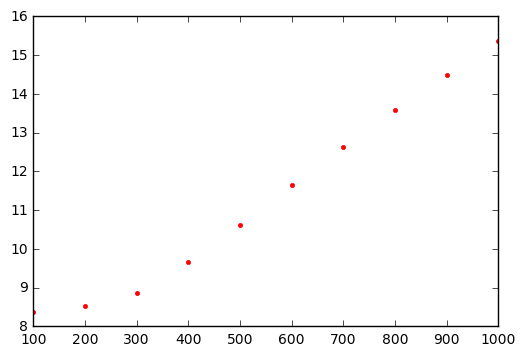

In [15]:
plt.plot(df_small['system_size'], df_small['Payback period'],'.',color = 'red') 

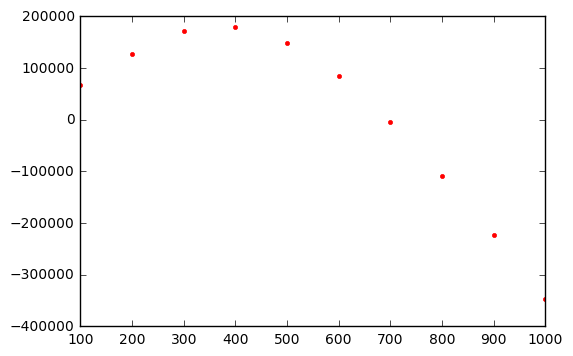

In [16]:
plt.plot(df_small['system_size'], df_small['NPV'],'.',color = 'red') 

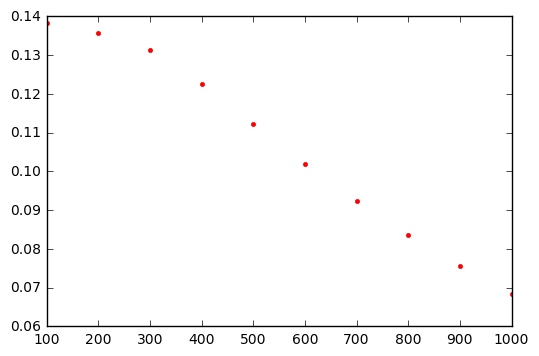

In [17]:
plt.plot(df_small['system_size'], df_small['IRR'],'.',color = 'red') 

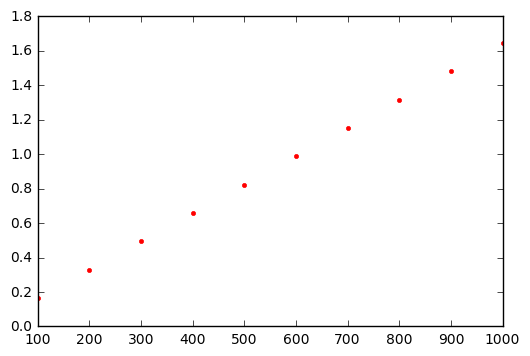

In [22]:
plt.plot(df_small['system_size'], df_small['Annual energy']/df_small['Annual load'],'.',color = 'red') 

Next we will refine the search around the optimal in the first iteration. First, we idenitify the extreme values in this grid search first.

In [23]:
Value = 'Payback period'
idx = df[['Customer type','Scheme','Sensitivity','Province','system_size']+[Value]]\
     .groupby(['Customer type','Scheme','Sensitivity','Province'])[Value].transform(min) == df[Value]
df_extreme = df[idx]
df_extreme.to_csv(OutputDir + 'optimal_'+ Value + '_first_iteration.csv')

In [24]:
Value = 'NPV'
idx = df[['Customer type','Scheme','Sensitivity','Province','system_size']+[Value]]\
     .groupby(['Customer type','Scheme','Sensitivity','Province'])[Value].transform(max) == df[Value]
df_extreme = df[idx]
df_extreme.to_csv(OutputDir + 'optimal_'+ Value + '_first_iteration.csv')

In [25]:
Value = 'IRR'
idx = df[['Customer type','Scheme','Sensitivity','Province','system_size']+[Value]]\
     .groupby(['Customer type','Scheme','Sensitivity','Province'])[Value].transform(max) == df[Value]
df_extreme = df[idx]
df_extreme.to_csv(OutputDir + 'optimal_'+ Value + '_first_iteration.csv')

Here are some query examples on optimal values.

In [29]:
#Query without region
df_small = df_extreme[(df_extreme['Customer type'] == Customer)&(df_extreme['Scheme'] == Scheme)\
                      &(df_extreme['Sensitivity'] == Sensitivity)]

In [27]:
#Example of data query
#df_small[['Province','system_size',Value]]

#### df_small = df_extreme[(df_extreme['Customer type'] == Customer)]
set(df_small['system_size'])